※ このNotebookでは、perftoolを使って統計情報のグラフを表示します。


perftoolの実行を行うノードとコンテナは「perftool_build_environment.ipynb」の Notebook で起動したVCノードであることを想定しています。
perftoolはコンテナ上で実行されます。

それ以外のノードに対して実行する場合は、以下の条件を満たすように準備を行ってください。

1. 対象となるノードを ssh で操作できる
1. Docker のセットアップが済んでいる
1. perftool実行に利用するツールがインストールされているコンテナが起動していること
  - python3.6
  - SINETStreamのPython3ライブラリ 1.5.0

# perftool.py の仕様

- 概要
- 前提条件
- 書式
- オプション
- 出力
- 実行例

## 概要

本ツールは、[SINETStream Writer/Reader API](https://www.sinetstream.net/docs/userguide/api-python.html)によるデータの送信/受信を実行し、その際に取得されたメトリクス情報を出力する。
メトリクス情報は、[SINETStream API Metricsクラス](https://www.sinetstream.net/docs/userguide/api-python.html)のプロパティのうちraw(メッセージングシステム固有の統計情報)を除くものを標準出力に出力する。
メトリクス情報の計測期間は、Writerがオプション等で指定されたサンプリング数のデータ送信を開始/終了する期間とし、Readerも同期間とする。
そのため、データ通信に問題がない場合もReaderの受信数はWriterの送信数より少なくなることがある。
送信データのペイロード型はバイト列を使用する。


## 前提条件

- Python3.6
- SINETStream v1.5.0(Python)
- [SINETStream API 設定ファイル](https://github.com/nii-gakunin-cloud/sinetstream/blob/main/docs/userguide/config.md) (データ送受信先の接続情報等が記述されているもの)

### 設定ファイル記述例
```
service-perftool-kafka:
    type: kafka
    brokers: "broker:9092"
    topic: topic-perftool-kafka

service-perftool-mqtt:
    type: mqtt
    brokers: "broker:1883"
    topic: topic-perftool-mqtt

```

## 書式

perftool.py -s|--service *SERVICE_NAME* [-f|--format *FORMAT*] [-c|--output-count *OUTPUT_COUNT*] [-n|--num-samples *NUM_SAMPLES*] [-p|--payload-size *PAYLOAD_SIZE*] [-a|--async-api]

## オプション

- `-s`, `--service` *SERVICE_NAME*
    * SINETStream API で使用するサービス名
- `-f`, `--format` *FORMAT*
    * 出力形式。jsonかtsvが指定可能。デフォルト:json
- `-c`, `--output-count` *OUTPUT_COUNT*
    * *OUTPUT_COUNT*回メトリクス情報を計測し出力する。デフォルト:1
- `-n`, `--num-samples` *NUM_SAMPLES*
    * 一回のメトリクス情報を出力するまでに*NUM_SAMPLES*個のデータ送信を試行する。デフォルト:300
- `-p`, `--payload-size` *PAYLOAD_SIZE*
    * データ送信試行時に*PAYLOAD_SIZE*バイトのペイロード長のデータを使用する。デフォルト:1024
- `-a`, `--async-api`
    * 指定した場合はデータの送信/受信に非同期APIを使用する。指定しなかった場合は同期APIを使用する

## 出力
### JSON形式
`-c`, `--output-count`オプションで指定した回数この形式で出力する
ここでは人間が見やすいよう整形してコメントも追記しているが、実際は改行無しで
詰めた形式で出力される。
実際の出力は実行例を参照。

```
{
    # writerのメトリクス情報
     "writer": {
         "start_time": 1616591251.9623938,
         "start_time_ms": 1616591251962.3938,
         "end_time": 1616591255.0322828,
         "end_time_ms": 1616591255032.2827,
         "time": 3.0698890686035156,
         "time_ms": 3069.8890686035156,
         "msg_count_total": 1000,
         "msg_count_rate": 325.7446694824375,
         "msg_bytes_total": 1044000,
         "msg_bytes_rate": 340077.43493966473,
         "msg_size_min": 1044,
         "msg_size_max": 1044,
         "msg_size_avg": 1044.0,
         "error_count_total": 0,
         "error_count_rate": 0.0
     },
    # readerのメトリクス情報
     "reader": {
         "start_time": 1616591251.962402,
         "start_time_ms": 1616591251962.402,
         "end_time": 1616591255.0317662,
         "end_time_ms": 1616591255031.766,
         "time": 3.069364070892334,
         "time_ms": 3069.364070892334,
         "msg_count_total": 1000,
         "msg_count_rate": 325.8003863025859,
         "msg_bytes_total": 1044000,
         "msg_bytes_rate": 340135.60329989967,
         "msg_size_min": 1044,
         "msg_size_max": 1044,
         "msg_size_avg": 1044.0,
         "error_count_total": 0,
         "error_count_rate": 0.0}
     }
}
```

### TSV形式
writerとreaderのメトリクス情報を一行で出力する。writerのメトリクス情報ののヘッダはプレフィクスとして"`writer_`"を付与している。readerのプレフィクスは"`reader_`"としている。
出力は、1行目がヘッダ、以降は `-c`, `--output-count`オプションで指定した回数分のデータ行となる。
ここではヘッダの一覧を示す。
実際の出力は実行例を参照。

```
    writer_start_time
    writer_start_time_ms
    writer_end_time
    writer_end_time_ms
    writer_time
    writer_time_ms
    writer_msg_count_total
    writer_msg_count_rate
    writer_msg_bytes_total
    writer_msg_bytes_rate
    writer_msg_size_min
    writer_msg_size_max
    writer_msg_size_avg
    writer_error_count_total
    writer_error_count_rate
    reader_start_time
    reader_start_time_ms
    reader_end_time
    reader_end_time_ms
    reader_time
    reader_time_ms
    reader_msg_count_total
    reader_msg_count_rate
    reader_msg_bytes_total
    reader_msg_bytes_rate
    reader_msg_size_min
    reader_msg_size_max
    reader_msg_size_avg
    reader_error_count_total
    reader_error_count_rate
```

## 実行例

```
$ python3 perftool.py -s service-perftool-kafka
{"writer": {"start_time": 1616677087.4501278, "start_time_ms": 1616677087450.128, "end_time": 1616677088.464487, "end_time_ms": 1616677088464.487, "time": 1.0143592357635498, "time_ms": 1014.3592357635498, "msg_count_total": 300, "msg_count_rate": 295.7532099307773, "msg_bytes_total": 313200, "msg_bytes_rate": 308766.3511677315, "msg_size_min": 1044, "msg_size_max": 1044, "msg_size_avg": 1044.0, "error_count_total": 0, "error_count_rate": 0.0}, "reader": {"start_time": 1616677087.4501393, "start_time_ms": 1616677087450.1394, "end_time": 1616677088.463871, "end_time_ms": 1616677088463.871, "time": 1.0137317180633545, "time_ms": 1013.7317180633545, "msg_count_total": 234, "msg_count_rate": 230.83030335386613, "msg_bytes_total": 244296, "msg_bytes_rate": 240986.83670143623, "msg_size_min": 1044, "msg_size_max": 1044, "msg_size_avg": 1044.0, "error_count_total": 0, "error_count_rate": 0.0}}
```

```
$ python3 perftool.py -s service-perftool-kafka  -f tsv -c 3 -n 1000 -p 1024 -a
writer_start_time       writer_start_time_ms    writer_end_time writer_end_time_ms      writer_time     writer_time_ms  writer_msg_count_total  writer_msg_count_rate   writer_msg_bytes_total  writer_msg_bytes_rate   writer_msg_size_min     writer_msg_size_max     writer_msg_size_avg     writer_error_count_total        writer_error_count_rate reader_start_time       reader_start_time_ms    reader_end_time reader_end_time_ms      reader_time     reader_time_ms  reader_msg_count_total  reader_msg_count_rate   reader_msg_bytes_total  reader_msg_bytes_rate   reader_msg_size_min     reader_msg_size_max     reader_msg_size_avg     reader_error_count_total        reader_error_count_rate
1616591229.4149387      1616591229414.9387      1616591230.9502277      1616591230950.2278      1.5352890491485596      1535.2890491485596      1000    651.3431464612999       1044000 680002.2449055971       1044    1044    1044.0  0       0.0     1616591229.296469       1616591229296.469       1616591230.940047       1616591230940.047       1.643578052520752       1643.578052520752       976     593.8263768508657       1018944 619954.7374323038       1044    1044    1044.0  0       0.0
1616591231.1887398      1616591231188.7397      1616591232.7698293      1616591232769.8293      1.5810894966125488      1581.0894966125488      1000    632.4752660380574       1044000 660304.1777437319       1044    1044    1044.0  0       0.0     1616591231.0742073      1616591231074.2073      1616591232.7586951      1616591232758.695       1.6844878196716309      1684.4878196716309      967     574.0617347939649       1009548 599320.4511248994       1044    1044    1044.0  0       0.0
1616591233.01446        1616591233014.4602      1616591234.5790718      1616591234579.0718      1.5646116733551025      1564.6116733551025      1000    639.1362259592711       1044000 667258.219901479        1044    1044    1044.0  0       0.0     1616591232.9014885      1616591232901.4885      1616591234.5769625      1616591234576.9624      1.675473928451538       1675.473928451538       994     593.2649760289903       1037736 619368.6349742659       1044    1044    1044.0  0       0.0
```

# 環境設定

In [2]:
import os

# 実行環境にあわせて書きかえてください
# hostノード設定
host_ip = "172.30.2.7"
host_user = "root"
host_docker_path = "/usr/local/bin/docker"
ssh_private_key = os.path.expanduser('~/.ssh/id_rsa')

ssh_opts = f"-i {ssh_private_key} -l {host_user}"
docker = f"ssh {ssh_opts} {host_ip} {host_docker_path}"

# perftool実行コンテナ設定
container_name = "reader"
container_user = "user01" # perftoolの実行ユーザ
container_base_dir = "/home/user01/sinetstream/" # perftoolフォルダの転送先
container_work_dir = f"{container_base_dir}perftool/" # perftool.pyが置かれるディレクトリ


# perftoolの実行環境への配置

このNotebookがあるフォルダにあるperftoolフォルダを実行環境に転送します。

perftoolフォルダには次のファイルが置いてあることが前提です。
- perftool/perftool.py
- perftool/template.sinetstream_config.yml

In [86]:
# ファイルの転送
!tar -cf - perftool | {docker} cp - {container_name}:{container_base_dir}

# 設定ファイルのrename
!{docker} exec -t {container_name} mv {container_work_dir}template.sinetstream_config.yml {container_work_dir}.sinetstream_config.yml

# perftoolプログラムファイルに実行権限の付与
#!{docker} exec -t {container_name} chmod a+x {container_work_dir}perftool.py

SINETStreamの設定ファイル(.sinetstream_config.yml)にはブローカーの接続情報等が記述されています。必要に応じて実行環境にあわせて書き換えてください。

# 実行


## perftool の実行

perftool.pyを実行し、実行結果をファイルに出力します。

In [3]:
output_count = 30
num_samples = 300
payload_size = 1024
async_flag = True # 非同期実行の場合はTrue
service_name = 'service-perftool-mqtt'

result_file = 'perf_result.tsv' # このNotebookと同じフォルダにこの名前の結果ファイルが作成されます。

async_option = ('-a' if async_flag else '')
!{docker} exec -t -u {container_user} -w {container_work_dir} {container_name} python3 perftool.py -s {service_name} {async_option} -n {num_samples} -c {output_count} -f tsv | tee {result_file}


## perftoolの実行結果のグラフ表示

perftool.pyの実行結果ファイルの内容をグラフで表示します。

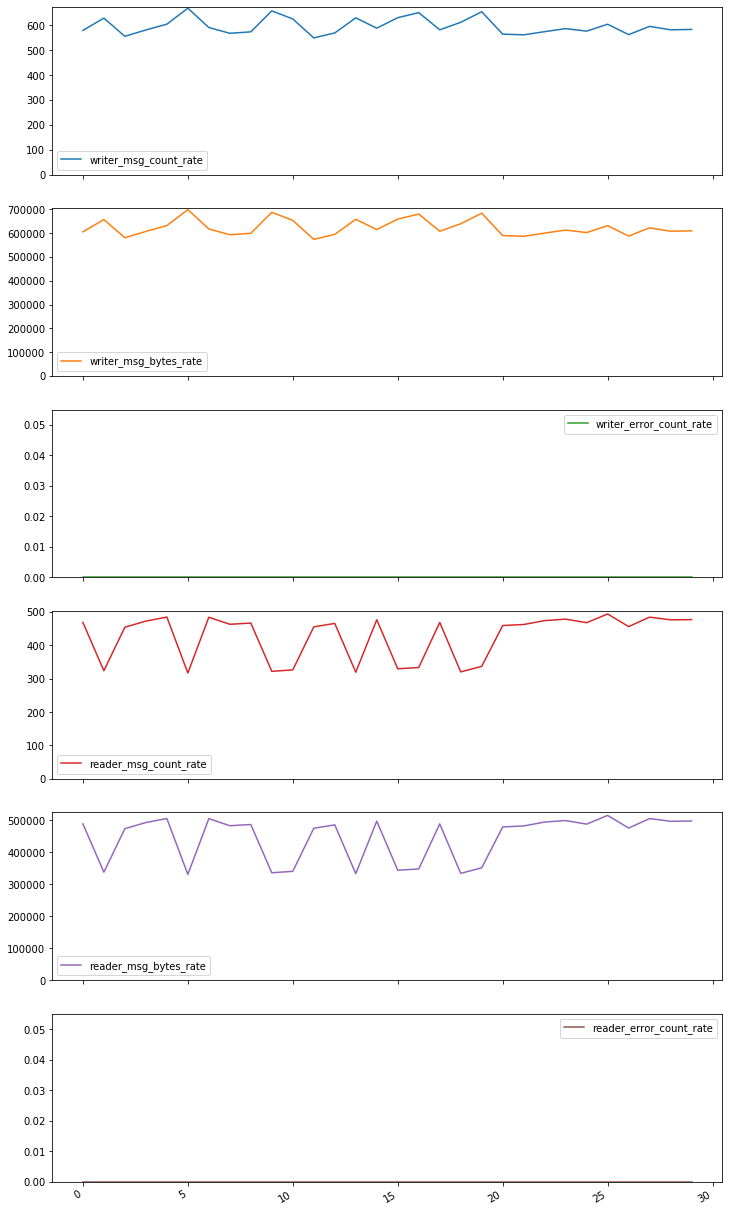

In [17]:
#グラフとして表示する項目のコメントアウトを外してください。(複数可能)
output_columns = [
#        'writer_start_time',
#        'writer_start_time_ms'
#        'writer_end_time',
#        'writer_end_time_ms', 
#        'writer_time',
#        'writer_time_ms',
#        'writer_msg_count_total',
        'writer_msg_count_rate',
#        'writer_msg_bytes_total',
        'writer_msg_bytes_rate',
#        'writer_msg_size_min',
#        'writer_msg_size_max',
#        'writer_msg_size_avg',
#        'writer_error_count_total',
        'writer_error_count_rate',
#        'reader_start_time',
#        'reader_end_time',
#        'reader_time',
#        'reader_msg_count_total',
        'reader_msg_count_rate',
#        'reader_msg_bytes_total',
        'reader_msg_bytes_rate',
#        'reader_msg_size_min',
#        'reader_msg_size_max',
#        'reader_msg_size_avg',
#        'reader_error_count_total',
        'reader_error_count_rate',
]

import pandas
import matplotlib.pyplot as pyplot

fig_height = 4 * len(output_columns)
df = pandas.read_table(result_file)
df.loc[:,output_columns].plot.line(subplots=True, figsize=(12,fig_height), ylim=[0, None])
pyplot.show()
